# Data Mining for Business Analytics

## Complexity control via Regularization

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***

Import all of the packages we will need.

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics

from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4]

### Complexity Control, revisited

One of the most important fundamental principles underlying data science, the basis for machine learning, is *complexity control*.  We must manage the tension between allowing ourselves to fit complex patterns in the data (a good thing), and the tendency to fit idiosyncracies in a particular data set--things that do not generalize (a bad thing).  So we attempt to **control model complexity**.

One way to do that is just not to allow our data mining procedure to fit complex models in the first place.  Using _few_ features is a way to do this (but which ones?). Is there a way to address the problem in a <i>data-driven fashion</i> ?


### Complexity Control for Decision Tree

Given our previous discussion(s), what is it that makes Decision Trees _complex_ ? What did we do to address this problem?

<br/>
<img src="images/deep_tree.png" height=100% width=100% />


We run our accuracy on our train and test set and get the following results:
<img src="images/d20_tree_acc.png" />
***

Unfortunately, there are situations where _few_ features are not a realistic option -- text classification is an example. So let's consider the case where we have larger feature sets or non-linearities which might add important predictive power.

_Again_, visualizing a high dimensional space is not practically feasible. We will illustrate the concepts using a two-dimensional dataset, but the idea applies in general, no matter how many features we have.

This notebook comes with a CSV file that is a reduced version of the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset is within the `"data/"` directory.

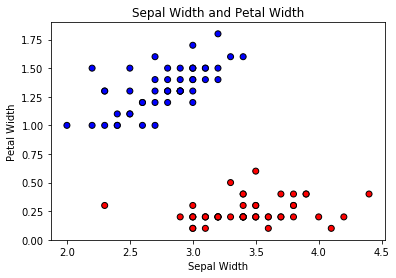

In [2]:
flowersDf = pd.read_csv('data/flowers_data.csv')
data_tools.Decision_Surface(flowersDf, flowersDf["Class"], model=None )

That looks like an easy dataset, with linearly separable classes. Let's use a Logistic Regression Classifier. We will also plot the **Decision Boundary**, i.e., the line that according to our model separates the two classes.

To plot the decision boundary, we need to first write the code for it. We'll start with that. Afterwards, we will train our classifier and plot the information.

In [3]:

def Decision_Boundary(features, target, model):
    # Get bounds
    x_min, x_max = features.min()[0], features.max()[0]
    y_min, y_max = features.min()[1], features.max()[1]

    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01), np.arange(y_min, y_max,0.01))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

    Z = np.ones(xx.shape)
    if model is not None:
        Z = model.predict(meshed_data).reshape(xx.shape)

    plt.title("Decision Boundary")
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])

    color = data_tools.Color_Data_Points(target)
    cs = plt.contour(xx, yy, Z)
    plt.scatter(features[features.columns[0]], features[features.columns[1]], color=color, edgecolor='black' )
    return


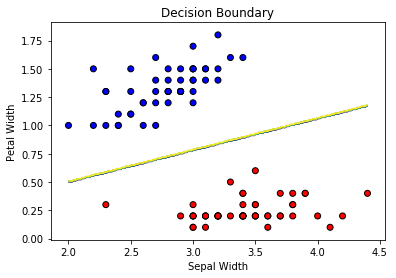

In [4]:

features = flowersDf[["Sepal Width", "Petal Width"]]  # Let's just get the features of interest
labels = flowersDf["Class"]  # The values for the target variable are often called "labels"

logRegClf = LogisticRegression(C=100000000)
logRegClf.fit( features, labels )
Decision_Boundary(features, labels, model=logRegClf )


Let's see how the Decision Boundary changes as we change the dataset. We will first visualize the datasets and then do the same for the respective decision boundaries.

In [5]:
# This method will take an existing dataframe and append a single value to the end.
# It will return a new dataset
def append_data(dframe, values):
    new_dframe = dframe.copy()
    new_dframe.loc[-1] = values
    new_dframe.index += 1
    new_dframe.sort_index()
    return new_dframe


In [6]:
# Include a new data point to the original data
extraFlower1 = append_data(flowersDf, [3, 1, 0])

# Include a new data point to the original data
extraFlower2 = append_data(flowersDf, [4, 0.7, 1])

C:\Users\ashle\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


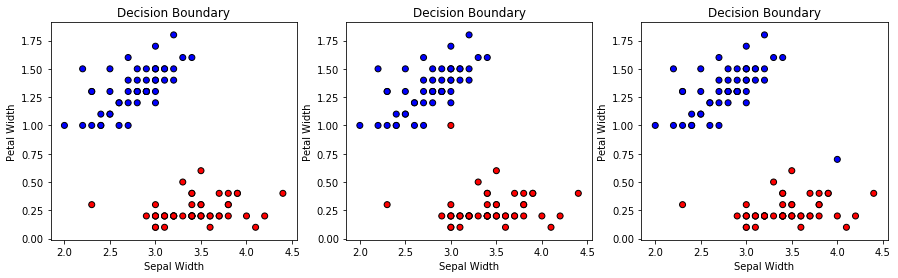

In [7]:

# visualize the information that appears in the dataframe
def visualize_flowers( df, model=None ):
    features = df[["Sepal Width", "Petal Width"]]  # Let's just get the features of interest
    labels = df["Class"]  # The values for the target variable are often called "labels"

    # If we were given an actual model, we are training it here.
    if model is not None:
        model.fit(features, labels)

    Decision_Boundary(features, labels, model)
    # data_tools.Decision_Surface(features, labels, model=model)
    return


# Setting the overall size (width, height) of the display area
plt.figure(figsize=(15,4))

#Let's plot the three datasets side by side
plt.subplot(1,3,1)
visualize_flowers( flowersDf )

#Let's plot the three datasets side by side
plt.subplot(1,3,2)
visualize_flowers( extraFlower1 )

#Let's plot the three datasets side by side
plt.subplot(1,3,3)
visualize_flowers( extraFlower2 )

Let's see how the Decision Boundary changes for these datasets. Again, we will be learning a Logistic Regression Function for all three cases.

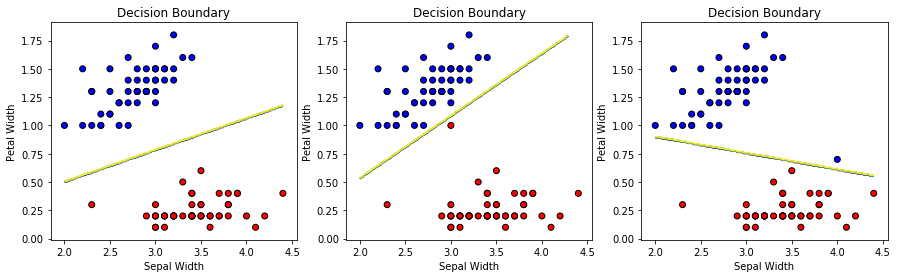

In [8]:

# We just "create" the model parameters here. We do *not* train it here.
# We will be training it inside the "visualize_flowers" method
untrainedLogReg = LogisticRegression(C=100000000)

plt.figure(figsize=(15,4))

#Let's plot the three datasets side by side
plt.subplot(1,3,1)
visualize_flowers( flowersDf, untrainedLogReg )

#Let's plot the three datasets side by side
plt.subplot(1,3,2)
visualize_flowers( extraFlower1, untrainedLogReg )

#Let's plot the three datasets side by side
plt.subplot(1,3,3)
visualize_flowers( extraFlower2, untrainedLogReg )

Let's try the same thing with an SVM classifier

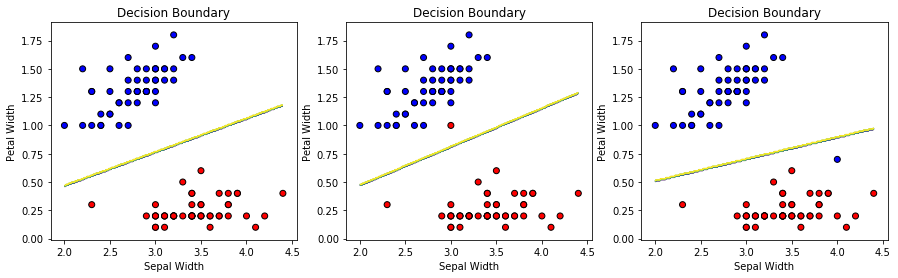

In [9]:

# We just "create" the model parameters here. We do *not* train it here.
# We will be training it inside the "visualize_flowers" method
untrainedSVM = LinearSVC()

plt.figure(figsize=(15,4))

#Let's plot the three datasets side by side
plt.subplot(1,3,1)
visualize_flowers( flowersDf, untrainedSVM )

#Let's plot the three datasets side by side
plt.subplot(1,3,2)
visualize_flowers( extraFlower1, untrainedSVM )

#Let's plot the three datasets side by side
plt.subplot(1,3,3)
visualize_flowers( extraFlower2, untrainedSVM )

### Complexity control for logistic regression (regularization)

Recall that when training a logistic regression classifier, we try to find the set of weights, $\textbf{w}$, that best fit the data based on some objective function. In this case, let's call our objective function $g()$, which means that we want $\arg\max_\textbf{w} g(\textbf{x}, \textbf{w})$.

What happens in the Logistic Regression case is that our model is trying to find the best $\textbf{w}$, even if "outliers" are accommodated in the process! Note that the model (by itself) **does not** know anything about outliers; _we_ perceive these data points as outliers. 

Mathematically, these outliers "force" $\textbf{w}$ to take very high values for some dimensions.  As our previous example showed, we do not want that to happen.  Instead, we want to **penalize** such situations -- and, more generally, penalize our "fit" of the data as it gets more complex. This is achieved by adding a "penalty term" into the objective function, using a **"regularization parameter"** $\lambda$ which controls how much importance our optimization procedure should place on the fit vs. the penalty. The new optimization formula becomes:

$\arg\max_\textbf{w} g(\textbf{x}, \textbf{w}) - \lambda \cdot \text{penalty}(\textbf{w})$.

The two most common type of regularization in logistic regression are the so-called $L_1$ and $L_2$ regularizations, which simply use the sum of the weights (w) and the sum of the squares of the weights, respectively, as the penalty.


**Extra note**: Several software packages (sklearn being one of them) represent the "regularization parameter" as `c`, which is usually $\frac{1}{\lambda}$. Therefore, smaller values of `c` lead to larger complexity penalties, and vice versa.

***

Let's try the above example with different values of regularization.

_Remember_: Sklearn uses the `c` parameter, which is $\frac{1}{\lambda}$. So, lower values of `c` incur a _higher_ penalty ("more" regularization).

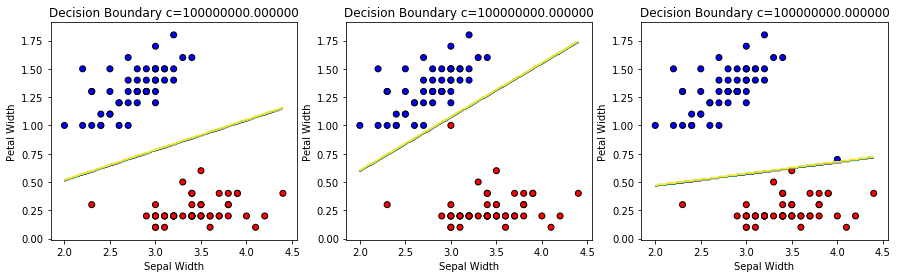

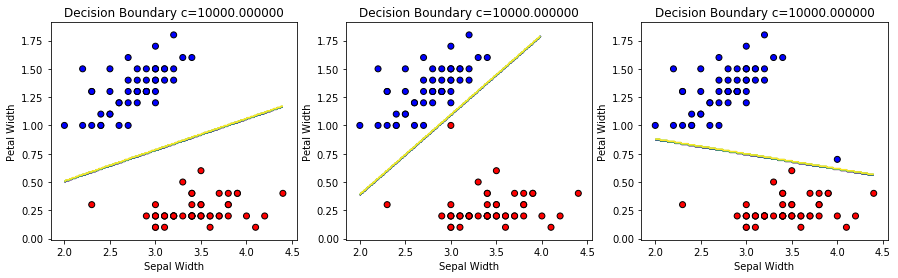

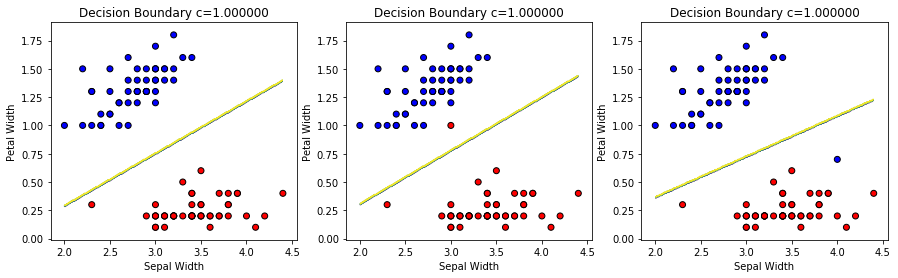

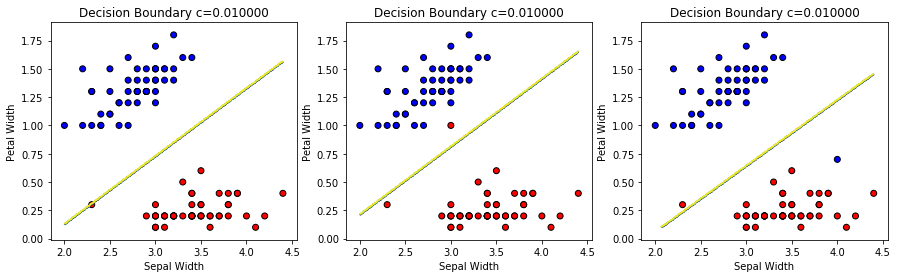

In [10]:
# Regularization values
cValues = [100000000, 10000, 1, 0.01]

for c in cValues:

    # Create the model with the desired parameters
    untrainedLogReg = LogisticRegression(C=c, solver='lbfgs')

    plt.figure(figsize=(15,4))

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 1)
    visualize_flowers( flowersDf, untrainedLogReg )
    plt.title("Decision Boundary c=%f" % c)

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 2)
    visualize_flowers( extraFlower1, untrainedLogReg )
    plt.title("Decision Boundary c=%f" % c)

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 3)
    visualize_flowers( extraFlower2, untrainedLogReg )
    plt.title("Decision Boundary c=%f" % c)

    plt.show()

And what happens when we change the type of regularization that we use?

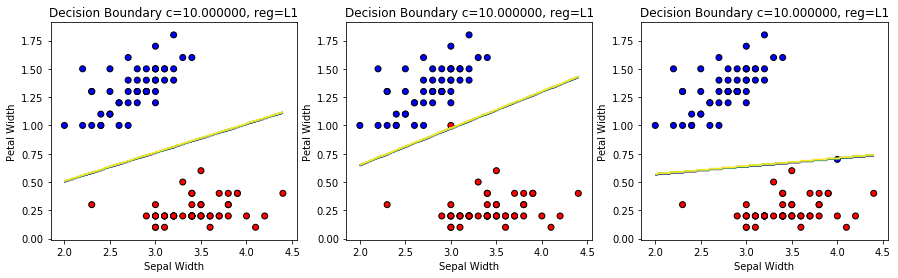

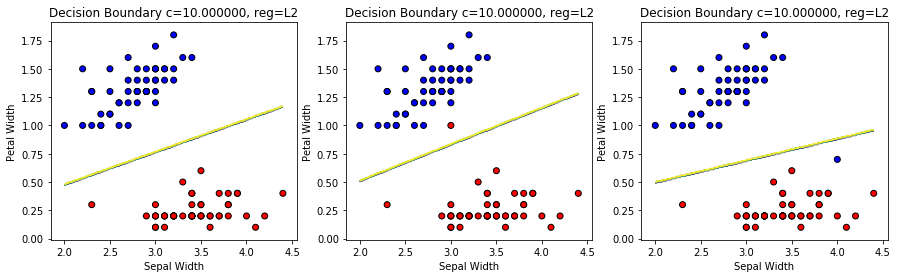

In [11]:

cValue = 10.0
for regularization in ["L1", "L2"]:

    # We have ommitted the "solver" parameter here
    untrainedLogReg = LogisticRegression(penalty=regularization.lower(), C=cValue)

    plt.figure(figsize=(15,4))

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 1)
    visualize_flowers( flowersDf, untrainedLogReg )
    plt.title("Decision Boundary c=%f, reg=%s" % (cValue, regularization))

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 2)
    visualize_flowers( extraFlower1, untrainedLogReg )
    plt.title("Decision Boundary c=%f, reg=%s" % (cValue, regularization))

    #Let's plot the three datasets side by side
    plt.subplot(1, 3, 3)
    visualize_flowers( extraFlower2, untrainedLogReg )
    plt.title("Decision Boundary c=%f, reg=%s" % (cValue, regularization))

    plt.show()

### What $\lambda$ value to use?

Can you think of a way to find a good value for the regularization parameter $\lambda$? What did we do for Decision Trees?

***